In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from dycoreutils import spatialaverage_utils as avg

In [2]:
plotpath="/web/web-data/staff/islas/verticalres/"

In [3]:
L32 = xr.open_mfdataset("/project/cas/islas/verticalresolution/f.e21.FWscHIST.ne30_L32_cam6_3_019_plus_CESM2.2.001.hf/Q_*.nc")
L32 = L32.Q
L32 = L32.sel(time=slice("1979-02","1990-01"))
L48 = xr.open_mfdataset("/project/cas/islas/verticalresolution/f.e21.FWscHIST.ne30_L48_cam6_3_019_plus_CESM2.2.001.hf/Q_*.nc")
L48 = L48.Q
L48 = L48.sel(time=slice("1979-02","1990-01"))
L48_BL10 = xr.open_mfdataset("/project/cas/islas/verticalresolution/f.e21.FWscHIST.ne30_L48_BL10_cam6_3_019_plus_CESM2.2.001.hf/Q_*.nc")
L48_BL10 = L48_BL10.Q
L48_BL10 = L48_BL10.sel(time=slice("1979-02","1990-01"))
L48_BL10_zm2 = xr.open_mfdataset("/project/cas/islas/verticalresolution/f.e21.FWscHIST.ne30_L48_BL10_cam6_3_019_plus_CESM2.2.001_zm2.hf/Q_*.nc")
L48_BL10_zm2 = L48_BL10_zm2.Q
L48_BL10_zm2 = L48_BL10_zm2.sel(time=slice("1979-02","1990-01"))
L93_zm2 = xr.open_mfdataset("/project/cas/islas/verticalresolution/L93_zm2/Q_*.nc")
L93_zm2 = L93_zm2.Q
L93_zm2 = L93_zm2.sel(time=slice("1979-02","1990-01"))

In [4]:
L32 = L32.mean('lon') 
L48 = L48.mean('lon')
L48_BL10 = L48_BL10.mean('lon')
L48_BL10_zm2 = L48_BL10_zm2.mean('lon')
L93_zm2 = L93_zm2.mean('lon')

In [5]:
L32_50 = L32.interp(lev=50.) 
L48_50 = L48.interp(lev=50)
L48_BL10_50 = L48_BL10.interp(lev=50.)
L48_BL10_zm2_50 = L48_BL10_zm2.interp(lev=50.)
L93_zm2_50 = L93_zm2.interp(lev=50.)

L32_100 = L32.interp(lev=200.) 
L48_100 = L48.interp(lev=200)
L48_BL10_100 = L48_BL10.interp(lev=200.)
L48_BL10_zm2_100 = L48_BL10_zm2.interp(lev=200.)
L93_zm2_100 = L93_zm2.interp(lev=200.)

In [6]:
L32_50_tropics = avg.cosweightlat(L32_50, -10, 10).compute()
L48_50_tropics = avg.cosweightlat(L48_50, -10, 10).compute()
L48_BL10_50_tropics = avg.cosweightlat(L48_BL10_50, -10, 10).compute()
L48_BL10_zm2_50_tropics = avg.cosweightlat(L48_BL10_zm2_50, -10, 10).compute()
L93_zm2_50_tropics = avg.cosweightlat(L93_zm2_50, -10, 10).compute()


L32_100_tropics = avg.cosweightlat(L32_100, -10, 10).compute()
L48_100_tropics = avg.cosweightlat(L48_100, -10, 10).compute()
L48_BL10_100_tropics = avg.cosweightlat(L48_BL10_100, -10, 10).compute()
L48_BL10_zm2_100_tropics = avg.cosweightlat(L48_BL10_zm2_100, -10, 10).compute()
L93_zm2_100_tropics = avg.cosweightlat(L93_zm2_100, -10, 10).compute()

In [7]:
L32_50_tropics_m = L32_50_tropics.sel(time=slice("1982-02","1990-01")).mean('time')
L48_50_tropics_m = L48_50_tropics.sel(time=slice("1982-02","1990-01")).mean('time')
L48_BL10_50_tropics_m = L48_BL10_50_tropics.sel(time=slice("1982-02","1990-01")).mean('time')
L48_BL10_zm2_50_tropics_m = L48_BL10_zm2_50_tropics.sel(time=slice("1982-02","1990-01")).mean('time')
L93_zm2_50_tropics_m = L93_zm2_50_tropics.sel(time=slice("1982-02","1990-01")).mean('time')

L32_100_tropics_m = L32_100_tropics.sel(time=slice("1982-02","1990-01")).mean('time')
L48_100_tropics_m = L48_100_tropics.sel(time=slice("1982-02","1990-01")).mean('time')
L48_BL10_100_tropics_m = L48_BL10_100_tropics.sel(time=slice("1982-02","1990-01")).mean('time')
L48_BL10_zm2_100_tropics_m = L48_BL10_zm2_100_tropics.sel(time=slice("1982-02","1990-01")).mean('time')
L93_zm2_100_tropics_m = L93_zm2_100_tropics.sel(time=slice("1982-02","1990-01")).mean('time')

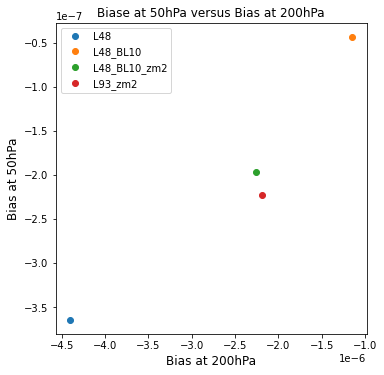

In [8]:
fig = plt.figure(figsize=(16,16))

ax = fig.add_axes([0.05,0.7,0.27,0.27])
ax.set_ylabel('Bias at 50hPa', fontsize=12)
ax.set_xlabel('Bias at 200hPa', fontsize=12)
ax.set_title('Biase at 50hPa versus Bias at 200hPa', fontsize=12)

ax.plot(L48_100_tropics_m-L32_100_tropics_m, L48_50_tropics_m-L32_50_tropics_m,"o",label="L48")
ax.plot(L48_BL10_100_tropics_m-L32_100_tropics_m, L48_BL10_50_tropics_m-L32_50_tropics_m,"o",label="L48_BL10")
ax.plot(L48_BL10_zm2_100_tropics_m-L32_100_tropics_m, L48_BL10_zm2_50_tropics_m-L32_50_tropics_m,"o",label="L48_BL10_zm2")
ax.plot(L93_zm2_100_tropics_m-L32_100_tropics_m, L93_zm2_50_tropics_m-L32_50_tropics_m,"o",label="L93_zm2")

ax.legend()

fig.savefig(plotpath+'z50_vs_z200.png', bbox_inches='tight', facecolor='white')

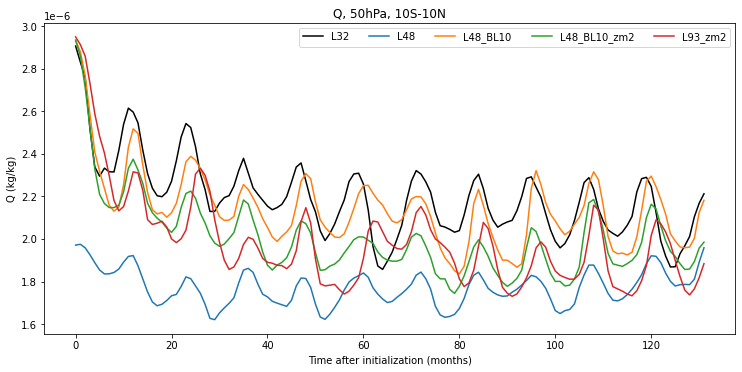

In [9]:
fig = plt.figure(figsize=(16,16))

ax = fig.add_axes([0.05,0.7,0.6,0.27])

ax.plot(np.arange(0,L32.time.size,1), L32_50_tropics, color='black', label='L32')
ax.plot(np.arange(0,L32.time.size,1), L48_50_tropics, label='L48')
ax.plot(np.arange(0,L32.time.size,1), L48_BL10_50_tropics, label='L48_BL10')
ax.plot(np.arange(0,L32.time.size,1), L48_BL10_zm2_50_tropics, label='L48_BL10_zm2')
ax.plot(np.arange(0,L32.time.size,1), L93_zm2_50_tropics, label='L93_zm2')

ax.set_title('Q, 50hPa, 10S-10N')
ax.set_ylabel('Q (kg/kg)')
ax.set_xlabel('Time after initialization (months)')
ax.legend(ncol=5)

fig.savefig(plotpath+'Q50timeseries.png', bbox_inches='tight', facecolor='white')

In [10]:
from dycoreutils import plot_utils as dycoreplt 
x1, x2, y1, y2 = dycoreplt.get3by3coords()

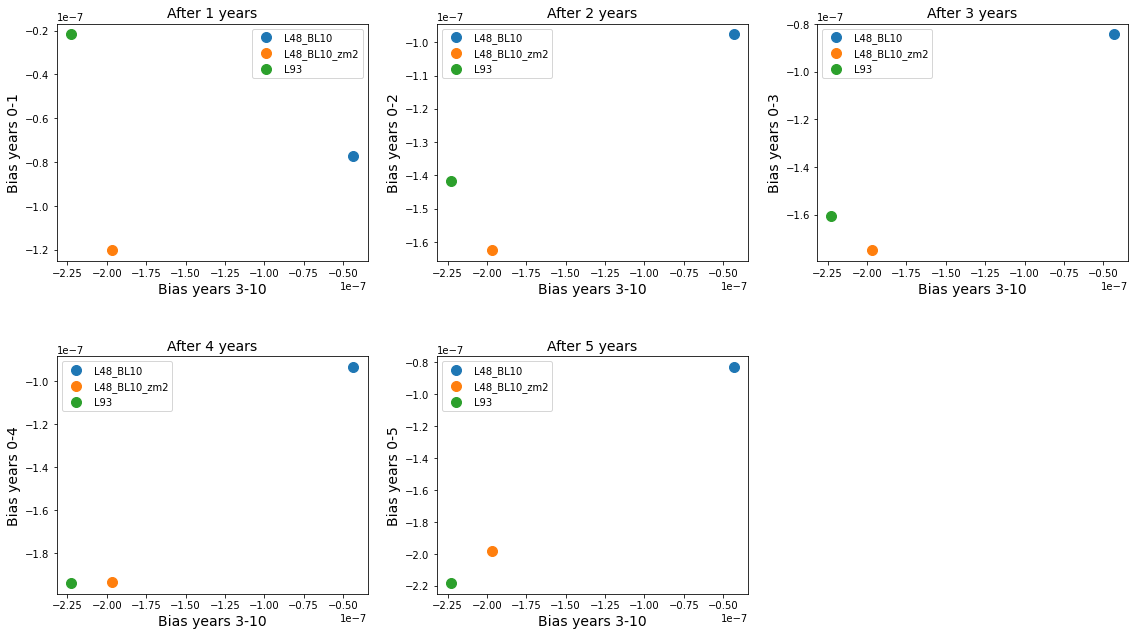

In [11]:
fig = plt.figure(figsize=(16,22))

nytest = [1,2,3,4,5]

count=0
for iy in np.arange(0,len(nytest),1):
    
    ax = fig.add_axes([x1[count],y1[count],x2[count]-x1[count],y2[count]-y1[count]])
    
    ax.set_xlabel('Bias years 3-10', fontsize=14)
    ax.set_ylabel('Bias years 0-'+str(nytest[iy]), fontsize=14)
    ax.set_title('After '+str(nytest[iy])+' years', fontsize=14)
    
    #L48plot = L48_50_tropics.isel(time=slice(0,np.int(nytest[iy]*12))).mean('time')
    L32plot = L32_50_tropics.isel(time=slice(0,np.int(nytest[iy]*12))).mean('time')
    L48_BL10plot = L48_BL10_50_tropics.isel(time=slice(0,np.int(nytest[iy]*12))).mean('time')
    L48_BL10_zm2plot = L48_BL10_zm2_50_tropics.isel(time=slice(0,np.int(nytest[iy]*12))).mean('time')
    L93_zm2plot = L93_zm2_50_tropics.isel(time=slice(0,np.int(nytest[iy]*12))).mean('time')
    
    #ax.plot(L48_50_tropics_m-L32_50_tropics_m, L48plot-L32plot,"o", label='L48')
    ax.plot(L48_BL10_50_tropics_m-L32_50_tropics_m, L48_BL10plot-L32plot,"o", label='L48_BL10', markersize=10)
    ax.plot(L48_BL10_zm2_50_tropics_m-L32_50_tropics_m, L48_BL10_zm2plot-L32plot,"o", label='L48_BL10_zm2', markersize=10)
    ax.plot(L93_zm2_50_tropics_m-L32_50_tropics_m, L93_zm2plot-L32plot,"o", label='L93', markersize=10)
    
    count=count+1
    
    ax.legend()
    
    fig.savefig(plotpath+"testlength.png", bbox_inches='tight', facecolor='white')

In [85]:
test = L48_50_tropics.isel(time=slice(0,1*12))

In [86]:
print(test)

<xarray.DataArray 'Q' (time: 12)>
array([1.97138057e-06, 1.97523870e-06, 1.95839357e-06, 1.92566409e-06,
       1.88877429e-06, 1.85432251e-06, 1.83600539e-06, 1.83637535e-06,
       1.84276617e-06, 1.85886232e-06, 1.89120611e-06, 1.91815668e-06])
Coordinates:
  * time     (time) object 1979-02-01 00:00:00 ... 1980-01-01 00:00:00
    lev      int64 50


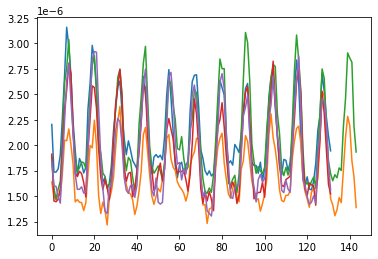

In [45]:
plt.plot(L32_100_tropics)
plt.plot(L48_100_tropics)
plt.plot(L48_BL10_100_tropics)
plt.plot(L48_BL10_zm2_100_tropics)
plt.plot(L93_zm2_100_tropics)

In [9]:
old = xr.open_mfdataset("/project/cas/islas/verticalresolution/L70_bugfix/Q_*.nc")
old = old.Q
new = xr.open_mfdataset("/project/cas/islas/verticalresolution/L93_zm2/Q_*.nc")
new = new.Q

In [10]:
old = old.mean('lon') ; new = new.mean('lon')

In [18]:
old100 = old.interp(lev=150.) ; new100 = new.interp(lev=150.)
old100tropics = avg.cosweightlat(old100,-10,10).compute()
new100tropics = avg.cosweightlat(new100,-10,10).compute()

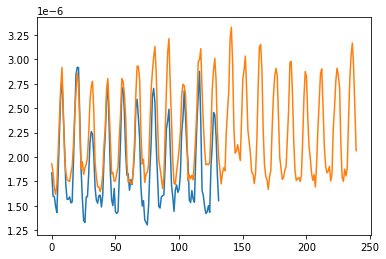

In [16]:
plt.plot(new100tropics)
plt.plot(old100tropics)

In [20]:
print(old100tropics)

<xarray.DataArray 'Q' (time: 240)>
array([8.15389414e-06, 7.83530987e-06, 8.47687746e-06, 8.47443411e-06,
       8.48749718e-06, 8.36422108e-06, 7.99127450e-06, 8.50018664e-06,
       8.16910439e-06, 8.06052079e-06, 8.31970797e-06, 8.03039416e-06,
       8.78522157e-06, 8.77108148e-06, 8.92831508e-06, 9.59441334e-06,
       9.22826962e-06, 9.40517376e-06, 8.89709590e-06, 9.31356900e-06,
       9.52859568e-06, 9.04274549e-06, 8.90643344e-06, 9.10755317e-06,
       8.59555818e-06, 8.60869994e-06, 9.15724867e-06, 8.82013598e-06,
       8.86713504e-06, 8.08378111e-06, 8.14883969e-06, 8.69051967e-06,
       8.98147805e-06, 8.39233543e-06, 7.82082697e-06, 7.75222472e-06,
       7.38657748e-06, 7.43931647e-06, 8.07180680e-06, 8.25319427e-06,
       7.92996143e-06, 7.74574579e-06, 7.68041736e-06, 8.51557859e-06,
       8.49977941e-06, 8.56580558e-06, 8.14027701e-06, 8.36815937e-06,
       7.69588344e-06, 8.36614447e-06, 8.71662945e-06, 8.48580703e-06,
       8.25489654e-06, 8.35238358e-06, 8.3

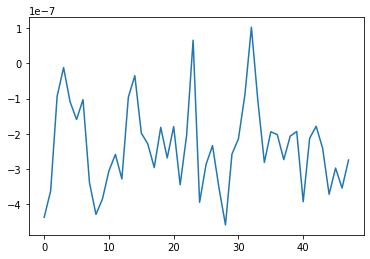

In [17]:
plt.plot(new100tropics-old100tropics)

In [6]:
print(old.lev)

<xarray.DataArray 'lev' (lev: 70)>
array([5.960300e-06, 9.826900e-06, 1.620185e-05, 2.671225e-05, 4.404100e-05,
       7.261275e-05, 1.197190e-04, 1.973800e-04, 3.254225e-04, 5.365325e-04,
       8.846025e-04, 1.458457e-03, 2.404575e-03, 3.978250e-03, 6.556826e-03,
       1.081383e-02, 1.789800e-02, 2.955775e-02, 4.873075e-02, 7.991075e-02,
       1.282732e-01, 1.981200e-01, 2.920250e-01, 4.101675e-01, 5.534700e-01,
       7.304800e-01, 9.559475e-01, 1.244795e+00, 1.612850e+00, 2.079325e+00,
       2.667425e+00, 3.404875e+00, 4.324575e+00, 5.465400e+00, 6.872850e+00,
       8.599725e+00, 1.070705e+01, 1.326475e+01, 1.635175e+01, 2.005675e+01,
       2.447900e+01, 2.972800e+01, 3.592325e+01, 4.319375e+01, 5.167750e+01,
       6.152050e+01, 7.375096e+01, 8.782123e+01, 1.033171e+02, 1.215472e+02,
       1.429940e+02, 1.682251e+02, 1.979081e+02, 2.328286e+02, 2.739108e+02,
       3.222419e+02, 3.791009e+02, 4.459926e+02, 5.246872e+02, 6.097787e+02,
       6.913894e+02, 7.634045e+02, 8.2085